## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice. #"In this study, 249 mice identified with SCC tumor growth were treated through a variety of drug regimens."
mice_count = merge_df["Mouse ID"].nunique()
mice_count

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df = merge_df.set_index("Mouse ID")
g989_df.loc[["g989"],:]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.loc[merge_df['Mouse ID'] != "g989"]

In [8]:
# Checking the number of mice in the clean DataFrame.
mice_count2 = clean_df["Mouse ID"].nunique()
mice_count2

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drugs_grouped = clean_df.groupby(["Drug Regimen"])

drugs_mean = drugs_grouped["Tumor Volume (mm3)"].mean()

drugs_median = drugs_grouped["Tumor Volume (mm3)"].median()

drugs_variance = drugs_grouped["Tumor Volume (mm3)"].var()

drugs_std = drugs_grouped["Tumor Volume (mm3)"].std()

drugs_sem = drugs_grouped["Tumor Volume (mm3)"].sem()

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugs_df = pd.DataFrame({
                                "Mean": drugs_mean, 
                                "Median": drugs_median,
                                "Variance": drugs_variance,
                                "Standard Deviation": drugs_std,
                                "SEM": drugs_sem
                              })
drugs_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Using the aggregation method, produce the same summary statistics in a single line

agg_df_1 = clean_df.groupby('Drug Regimen')
agg_df_2 = agg_df_1.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]
agg_df_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

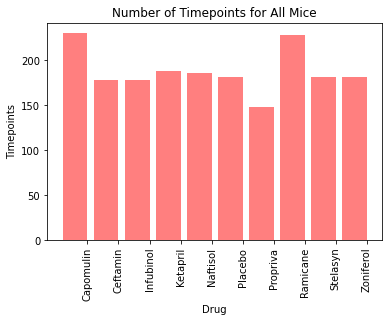

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_df = pd.DataFrame(clean_df.groupby(["Drug Regimen"]).count())

x_axis_pd = np.arange(len(bar_df))
tick_locations_pd = [value+0.4 for value in x_axis_pd]
plt.bar(x_axis_pd, bar_df["Timepoint"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations_pd, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"], rotation="vertical")
plt.title("Number of Timepoints for All Mice")
plt.xlabel("Drug")
plt.ylabel("Timepoints")
plt.show()

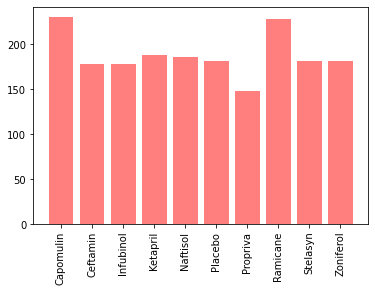

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
bar_df = pd.DataFrame(clean_df.groupby(["Drug Regimen"]).count())
x_axis = np.arange(len(bar_df))
y_axis=bar_df["Timepoint"]
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"], rotation="vertical")
plt.show()

#I can't figure out how to make this graph any other way...

In [14]:
#Setting up pie charts
mouse_gender = pd.DataFrame(clean_df.groupby(["Sex"]).count())

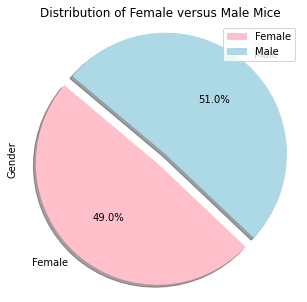

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors = ['pink', 'lightblue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Mouse ID',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")
plt.title("Distribution of Female versus Male Mice")
plt.ylabel("Gender")
plt.axis("equal")
plt.show()

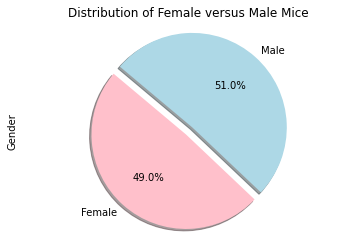

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mf_count = pd.DataFrame(clean_df.groupby(["Sex"]).count()) #to find numbers
labels = ["Female", "Male"]
mf_data = [922, 958]
colors = ["pink","lightblue"]
explode = (0.1,0)
plt.pie(mf_data, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Distribution of Female versus Male Mice")
plt.ylabel("Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
top_regimens = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_regimens_df = top_regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
top_regimens_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1,Ramicane,k403,5,38.825898
2,Ramicane,k403,10,35.014271
3,Ramicane,k403,15,34.223992
4,Ramicane,k403,20,32.997729
...,...,...,...,...
1868,Infubinol,z581,25,54.316407
1869,Infubinol,z581,30,56.286750
1870,Infubinol,z581,35,58.628399
1871,Infubinol,z581,40,60.053740


In [18]:
# Start by getting the last (greatest) timepoint for each mouse
last_tp = top_regimens_df.groupby('Mouse ID').max()['Timepoint']
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume = pd.merge(last_tp, clean_df, how="left", on =["Mouse ID", "Timepoint"])

In [19]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    tumor_volumes_located = tumor_volume['Tumor Volume (mm3)'].loc[tumor_volume['Drug Regimen'] == drug]
    
    # add subset 
    vol_data.append(tumor_volumes_located)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes_located.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lowerq = (quartiles[0.25])
    upperq = (quartiles[0.75])
    iqr = (upperq-lowerq)
    print(f'For {drug}, Interquartile Range (IQR) is {iqr}.')

    lower_bound = (lowerq - (1.5*iqr))
    upper_bound = (upperq + (1.5*iqr))
    print(f'For {drug}, values below {lower_bound} is considered an outlier.')
    print(f'For {drug}, values above {upper_bound}  is considered an outlier.')

For Capomulin, Interquartile Range (IQR) is 7.781863460000004.
For Capomulin, values below 20.70456164999999 is considered an outlier.
For Capomulin, values above 51.83201549  is considered an outlier.
For Ramicane, Interquartile Range (IQR) is 9.098536719999998.
For Ramicane, values below 17.912664470000003 is considered an outlier.
For Ramicane, values above 54.30681135  is considered an outlier.
For Infubinol, Interquartile Range (IQR) is 11.477135160000003.
For Infubinol, values below 36.83290494999999 is considered an outlier.
For Infubinol, values above 82.74144559000001  is considered an outlier.
For Ceftamin, Interquartile Range (IQR) is 15.577752179999997.
For Ceftamin, values below 25.355449580000002 is considered an outlier.
For Ceftamin, values above 87.66645829999999  is considered an outlier.


<ipython-input-20-7ae569fb055c>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(drug_list) #I'm getting a warning saying FixedFormatter should only be used


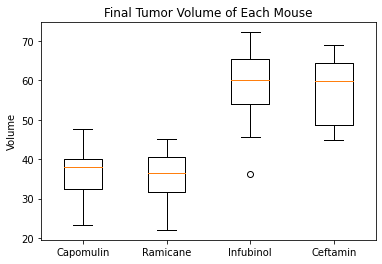

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Each Mouse")
ax1.set_ylabel("Volume")
ax1.set_xticklabels(drug_list) #I'm getting a warning saying FixedFormatter should only be used 
                                #together with FixedLocator-- tried to solve that, but can't figure it out...
ax1.boxplot(vol_data)
plt.show()

## Line and Scatter Plots

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]  
mouse.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [22]:
#s185
mouse_treated = clean_df[['Timepoint', 'Tumor Volume (mm3)']].loc[(clean_df['Drug Regimen'] == 'Capomulin') & (clean_df['Mouse ID']=='s185')]
mouse_treated

,Timepoint,Tumor Volume (mm3)
10,0,45.000000
11,5,43.878496
12,10,37.614948
13,15,38.177232
14,20,36.866876
15,25,33.949940
16,30,32.959671
17,35,28.328531
18,40,25.472143
19,45,23.343598


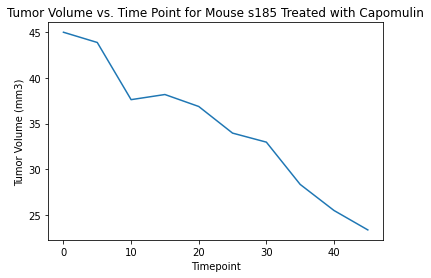

In [23]:
x_axis_line=mouse_treated["Timepoint"]
y_axis_line=mouse_treated["Tumor Volume (mm3)"]
plt.plot(x_axis_line, y_axis_line)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Time Point for Mouse s185 Treated with Capomulin")
plt.show()

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
avg_weights = mouse_weight.groupby(["Mouse ID"]).mean()
avg_weights.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


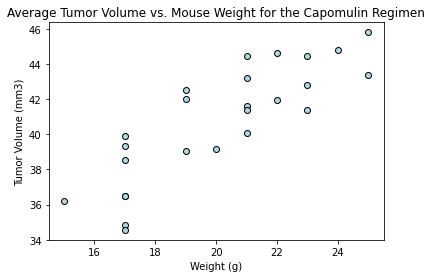

In [26]:
avg_mouse_weights = avg_weights["Weight (g)"]
avg_tumor_weights = avg_weights["Tumor Volume (mm3)"]

plt.scatter(avg_mouse_weights, avg_tumor_weights, marker="o", facecolors="lightblue", edgecolors="black")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [29]:
x_values = avg_mouse_weights
y_values = avg_tumor_weights
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


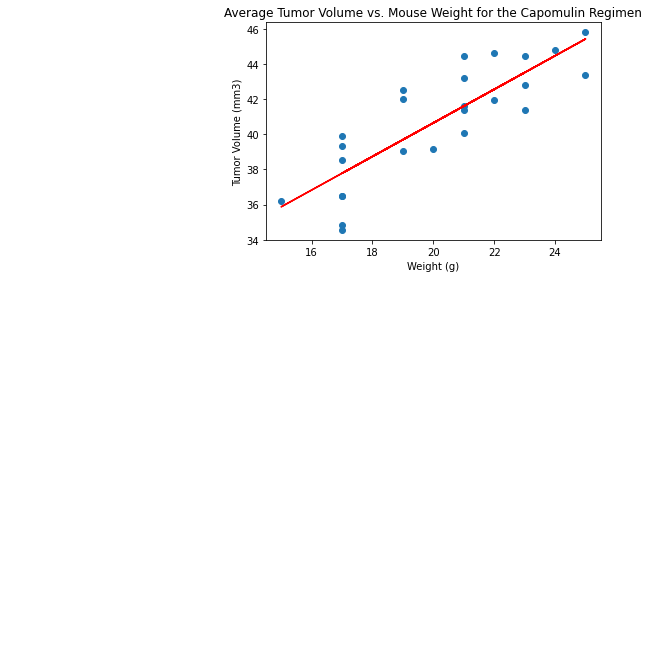

The correlation between mouse weight and tumor size is(0.8419363424694717, 1.322572243471279e-07)
The regression equation is y = 0.95x + 21.55. 
The r-squared is: 0.7088568047708717 with a p value of 1.3225722434712642e-07.


In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
print(f"The correlation between mouse weight and tumor size is{correlation}")
print(f"The regression equation is {line_eq}. ")
print(f"The r-squared is: {rvalue**2} with a p value of {pvalue}.")